In [ ]:
## Figures 

In [1]:
import sys
import warnings

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from tqdm import tqdm
from itertools import combinations
from tqdm import tqdm

sys.path.append("../src/")

import xgi
from reducibility_hg import *

from statannotations.Annotator import Annotator

sb.set_theme(style="ticks", context="paper")

results_dir = "../results/"
out_dir = f"{results_dir}datasets/"

In [2]:
xgi.load_xgi_data()

Available datasets are the following:
coauth-dblp
coauth-mag-geology
coauth-mag-history
congress-bills
contact-high-school
contact-primary-school
dawn
diseasome
disgenenet
email-enron
email-eu
hospital-lyon
hypertext-conference
invs13
invs15
kaggle-whats-cooking
malawi-village
ndc-classes
ndc-substances
science-gallery
sfhh-conference
tags-ask-ubuntu
tags-math-sx
tags-stack-overflow
threads-ask-ubuntu
threads-math-sx
threads-stack-overflow


In [3]:
dataset_categories = {
    "coauth-mag-geology_1980": "coauthorship",
    "coauth-mag-geology_1981": "coauthorship",
    "coauth-mag-geology_1982": "coauthorship",
    "coauth-mag-geology_1983": "coauthorship",
    "coauth-mag-geology_1988": "coauthorship",
    "coauth-dblp": "coauthorship",
    "coauth-mag-geology": "coauthorship",
    "coauth-mag-history": "coauthorship",
    "congress-bills": "other",
    "contact-high-school": "contact",
    "contact-primary-school": "contact",
    "dawn": "bio",
    "diseasome": "bio",
    "disgenenet": "bio",
    "email-enron": "technology",
    "email-eu": "technology",
    "hospital-lyon": "contact",
    "hypertext-conference": "contact",
    "invs13": "contact",
    "invs15": "contact",
    "kaggle-whats-cooking": "other",
    "malawi-village": "contact",
    "ndc-classes": "bio",
    "ndc-substances": "bio",
    "science-gallery": "contact",
    "sfhh-conference": "contact",
    "tags-ask-ubuntu": "technology",
    "tags-math-sx": "technology",
    "tags-stack-overflow": "technology"
}


## load dataset

In [4]:
stats = {}

datasets = [
    "coauth-mag-geology_1980",
    "coauth-mag-geology_1981",
    "coauth-mag-geology_1982",
    "coauth-mag-geology_1983",
    #"coauth-mag-geology_1988",
    #"coauth-dblp",
    #"coauth-mag-geology",
    #"coauth-mag-history",
    "congress-bills",
    "contact-high-school",
    "contact-primary-school",
    "dawn",
    #"diseasome",
    #"disgenenet",
    "email-enron",
    "email-eu",
    "hospital-lyon",
    "hypertext-conference",
    "invs13",
    "invs15",
    "kaggle-whats-cooking",
    "malawi-village",
    "ndc-classes",
    "ndc-substances",
    "science-gallery",
    "sfhh-conference",
    "tags-ask-ubuntu",
    "tags-math-sx",
    #"tags-stack-overflow"
]

#suffix = "no_rescaling"
suffix = "rescaling_present_orders"
#suffix = "tau_per_order"
#suffix = "norenorm_lap"

for name in datasets:
    
    stats[name] = {}
    
    #name = "hypertext-conference"
    data = np.load(f"{out_dir}/message_length_{name}_{suffix}.npz")

    stats[name] = data
    

In [5]:
stats_df = pd.DataFrame.from_dict(stats, orient="index")
stats_df["max_order"] = stats_df["orders"].apply(max)
stats_df["dataset"] = stats_df["dataset"].astype(str)
stats_df["N"] = stats_df["N"].astype(int)
stats_df["num_edges"] = stats_df["num_edges"].astype(int)
stats_df["order_min"] = stats_df["order_min"].astype(int)

# stats_df

In [6]:
stats_df = stats_df[["dataset", "N", "num_edges", "max_order", "order_min"]]

def reducibility(max_order, order_min):
    return (max_order - order_min) / (max_order - 1)

stats_df["reduce"] = stats_df.apply(lambda x: reducibility(x["max_order"], x["order_min"]), axis=1)
stats_df["category"] = stats_df['dataset'].map(dataset_categories)
stats_df["density"] = stats_df.apply(lambda x: x["N"] / x["num_edges"], axis=1)

stats_df = stats_df[["dataset", "category", "N", "num_edges", "density", "max_order", "order_min", "reduce"]]

stats_df

,dataset,category,N,num_edges,density,max_order,order_min,reduce
coauth-mag-geology_1980,coauth-mag-geology_1980,coauthorship,1350,657,2.054795,17,17,0.000000
coauth-mag-geology_1981,coauth-mag-geology_1981,coauthorship,464,233,1.991416,17,17,0.000000
coauth-mag-geology_1982,coauth-mag-geology_1982,coauthorship,1331,622,2.139871,17,17,0.000000
coauth-mag-geology_1983,coauth-mag-geology_1983,coauthorship,535,245,2.183673,14,14,0.000000
congress-bills,congress-bills,other,1718,104039,0.016513,399,353,0.115578
contact-high-school,contact-high-school,contact,327,7818,0.041827,4,3,0.333333
contact-primary-school,contact-primary-school,contact,242,12704,0.019049,4,2,0.666667
dawn,dawn,bio,2290,138742,0.016505,15,1,1.000000
email-enron,email-enron,technology,143,1459,0.098012,36,36,0.000000
email-eu,email-eu,technology,986,24520,0.040212,39,39,0.000000


In [9]:
pd.__version__

'1.5.3'

In [23]:
category_order = ["coauthorship", "other", "contact", "bio", "technology"]
stats_df["category"] = pd.Categorical(stats_df["category"], category_order)

In [26]:
stats_df = stats_df.sort_values(["category", "dataset"])

In [27]:
#stats_df[["dataset", "category", "N", "max_order", "order_min", "reduce"]].to_latex(
#    index_names=False, float_format="%.2f"
#)

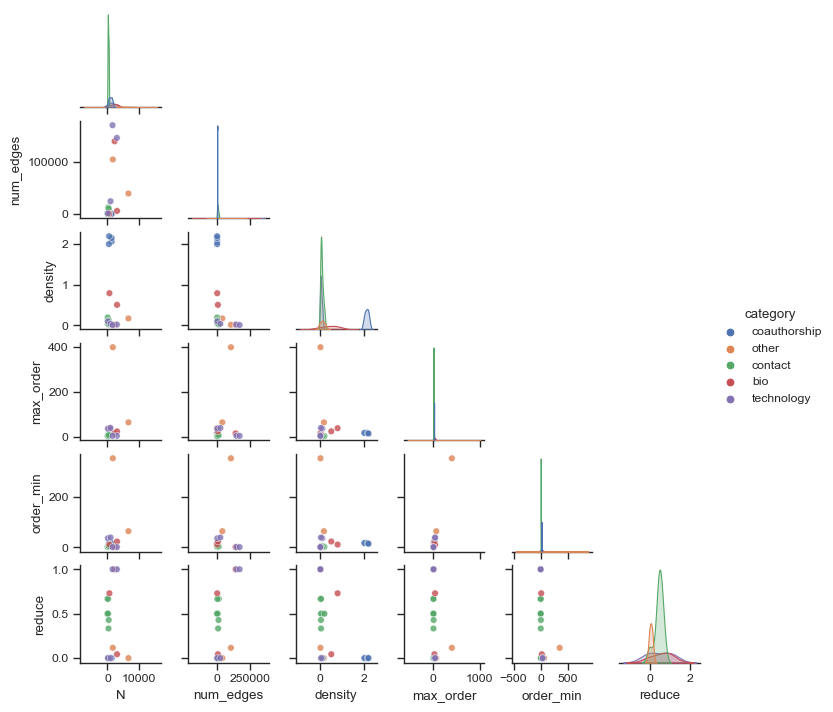

In [28]:
sb.pairplot(
    data=stats_df,
    hue="category",
    height=1.2,
    aspect=1,
    corner=True,
    plot_kws={"alpha": 0.8},
    #diag_kind="hist",
)

plt.show()

In [30]:
palette_seq = sb.color_palette(["#264653","#2a9d8f","#e9c46a","#f4a261","#e76f51"])
palette_seq

[(0.14901960784313725, 0.27450980392156865, 0.3254901960784314),
 (0.16470588235294117, 0.615686274509804, 0.5607843137254902),
 (0.9137254901960784, 0.7686274509803922, 0.41568627450980394),
 (0.9568627450980393, 0.6352941176470588, 0.3803921568627451),
 (0.9058823529411765, 0.43529411764705883, 0.3176470588235294)]

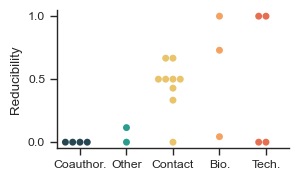

In [32]:
fig, ax = plt.subplots(figsize=(3, 1.8))

sb.swarmplot(data=stats_df, y="reduce", x="category", palette=palette_seq)

sb.despine()

#ax.set_title(suffix)

#ax.set_ylim([-0.1, 1.1])

ax.set_yticks([0, 0.5, 1])
ax.set_ylabel("Reducibility")
ax.set_xlabel("")
ax.set_xticklabels(["Coauthor.", "Other", "Contact", "Bio.", "Tech."])

fig_name = f"reduce_datasets_{suffix}"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

plt.show()

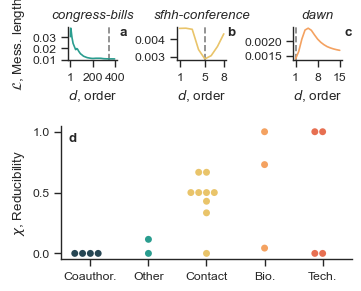

In [155]:
fig = plt.figure(layout="constrained", figsize=(3.5, 2.8))

subfigs = fig.subfigures(2, 1, height_ratios=[1, 1.6], hspace=0.1)

axs1 = subfigs[0].subplots(1, 3)

dataset_toplot = ["congress-bills", "sfhh-conference", "dawn"]
colors = [palette_seq[1], palette_seq[2], palette_seq[3]]

for i, name in enumerate(dataset_toplot):
    y = stats[name]["message_length"]
    x = stats[name]["orders"]
    axs1[i].plot(x, y, c=colors[i])
    #print(max(x))
    
    d_opt = x[np.argmin(y)]
    axs1[i].axvline(d_opt, ls="--", c="grey", zorder=-2)
    
    axs1[i].set_title(name, style="italic")
    axs1[i].set_xlabel("$d$, order")
    
axs1[0].set_ylabel("$\mathcal{L}$, Mess. length")
axs1[0].set_xticks([1, 200, 400])
axs1[1].set_xticks([1, 5, 8])
axs1[2].set_xticks([1, 8, 15])

#subfigs[0].suptitle('subfigs[0]\nLeft side')
#subfigs[0].supxlabel("$d$, order")

ax2 = subfigs[1].subplots(1, 1)

sb.swarmplot(data=stats_df, y="reduce", x="category", palette=palette_seq, ax=ax2)

sb.despine()

ax2.set_yticks([0, 0.5, 1])
ax2.set_ylabel(r"$\chi$, Reducibility")
ax2.set_xlabel("")
ax2.set_xticklabels(["Coauthor.", "Other", "Contact", "Bio.", "Tech."])


axs1[0].text(1.2, 1, "a", transform=axs1[0].transAxes, weight="bold", ha="right", va="top")
axs1[1].text(1.2, 1, "b", transform=axs1[1].transAxes, weight="bold", ha="right", va="top")
axs1[2].text(1.2, 1, "c", transform=axs1[2].transAxes, weight="bold", ha="right", va="top")
ax2.text(0.025, 0.95, "d", transform=ax2.transAxes, weight="bold", ha="left", va="top")



fig_name = f"figure_reduce_datasets"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")


plt.show()

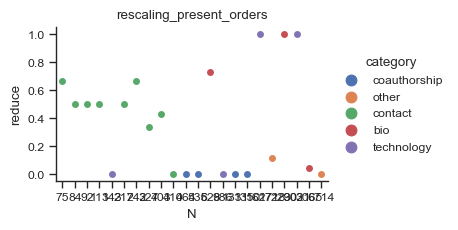

In [102]:
fig, ax = plt.subplots(figsize=(3.5,2))

sb.swarmplot(data=stats_df, y="reduce", x="N", hue="category", alpha=0.99)

sb.despine()
ax.set_title(suffix)

sb.move_legend(ax, loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)

fig_name = f"reduce_datasets_vs_maxorder_{suffix}"
#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

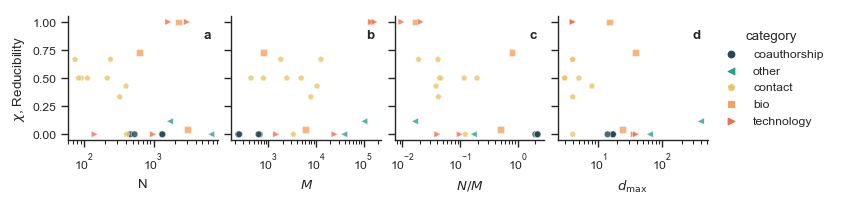

In [170]:
pp = sb.pairplot(
    data=stats_df,
    y_vars="reduce",
    x_vars=["N", "num_edges", "density", "max_order"], #, "order_min"],
    hue="category",
    height=1.8,
    aspect=1,
    palette=palette_seq,
    markers=["o", "<", "p", "s", ">"],
    plot_kws={"alpha": 0.8},
    diag_kind="kde",
)

for i, ax in enumerate(pp.axes.flat):
    if i==5:
        continue
    ax.set(xscale="log")
pp.axes[0,0].set_ylabel(r"$\chi$, Reducibility")

pp.axes[0,1].set_xlabel(r"$M$")
pp.axes[0,2].set_xlabel(r"$N / M$")

pp.axes[0,3].set_xlabel(r"$d_{\rm max}$")
#pp.axes[0,4].set_xlabel(r"$d_{\rm opt}$")

    
handles = pp._legend_data.values()
labels = pp._legend_data.keys()
#pp.fig.legend(handles=handles, labels=labels, loc='upper right', ncol=1, title="Category", frameon=False)
pp._legend.set_bbox_to_anchor((1, 0.7))


#sb.move_legend(pp.axes[0,0], loc="best")

import string
#string.ascii_lowercase
for i, ax in enumerate(pp.axes.ravel()):
    ax.text(0.95, 0.9, string.ascii_lowercase[i], transform=ax.transAxes, weight="bold", ha="right", va="top")


fig.set_size_inches(7, 1.8)

fig_name = f"reduce_datasets_correlations"
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight", pad_inches=0.1)


plt.show()

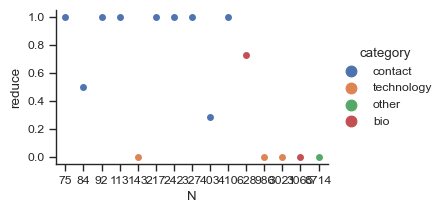

In [15]:
fig, ax = plt.subplots(figsize=(3.5,2))

sb.swarmplot(data=stats_df, y="reduce", x="N", hue="category", alpha=0.99)

sb.despine()

sb.move_legend(ax, loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)

fig_name = f"reduce_datasets_vs_N"
#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

## plot curves

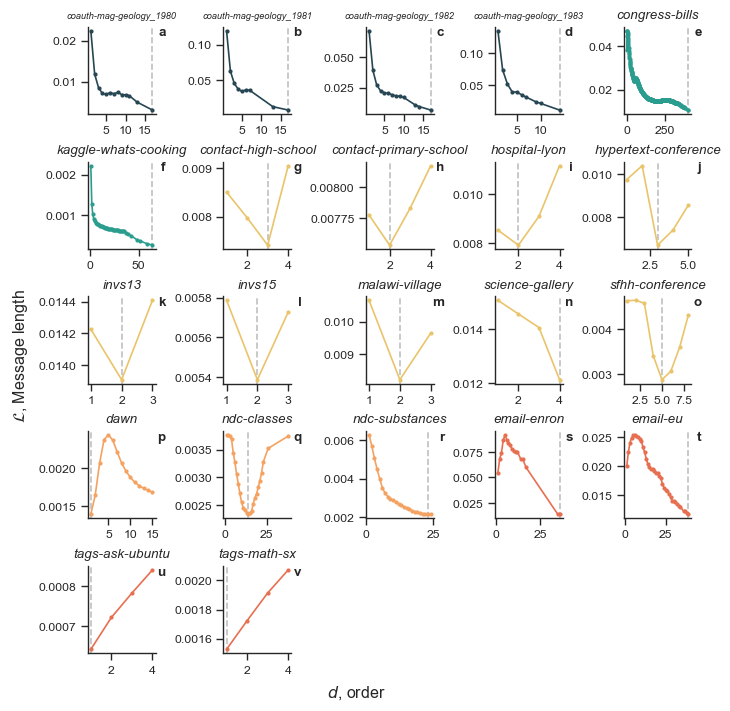

In [162]:
n_sets = len(datasets)

fig, axs = plt.subplots(5, 5, figsize=(7, 7), layout="constrained")

for i, name in enumerate(stats_df["dataset"]):
    
    ax = axs.ravel()[i]
    data = np.load(f"{out_dir}/message_length_{name}.npz")

    message_length = data["message_length"]
    Ds_H = data["KL"]
    lZs_H = data["complexity"]
    orders = data["orders"]
    N = int(data["N"])
    
    category = stats_df.iloc[i]["category"]
    idx = category_order.index(category)
    color = palette_seq[idx]
    
    message_length = Ds_H + lZs_H
    ax.plot(orders, message_length, "o-", c=color, ms=2)

    #ax.set_ylabel("Message Length")
    #ax.set_xlabel("Max Order")
    #ax.set_title("functional complex.")
    
    d_opt = np.argmin(message_length)
    ax.axvline(x=orders[d_opt], ls="--", c="silver", zorder=-1)

    # ax.set_title(f"{name} {year}, N={N}")
    ax.set_title(f"{name}", style="italic")
    if i <= 3:
        ax.set_title(f"{name}", style="italic", fontsize="x-small")
    
for ax in axs.ravel():
    if len(ax.lines)==0:
        ax.remove()
    
fig.supxlabel("$d$, order")
fig.supylabel(r"$\mathcal{L}$, Message length")

from matplotlib.ticker import MaxNLocator
#for ax in axs.ravel():
#    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

import string
#string.ascii_lowercase
for i, ax in enumerate(axs.ravel()):
    ax.text(1.15, 1, string.ascii_lowercase[i], transform=ax.transAxes, weight="bold", ha="right", va="top")


sb.despine()

fig_name = f"reduce_datasets_all_message_lengths"
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight", pad_inches=0.1)


plt.show()

In [157]:
import string
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [158]:
string.ascii_lowercase[0]

'a'

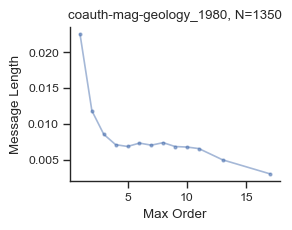

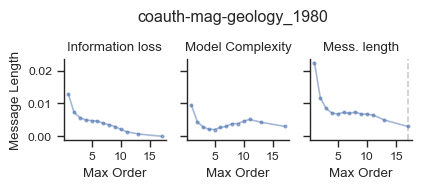

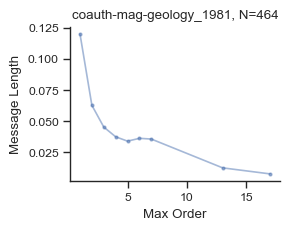

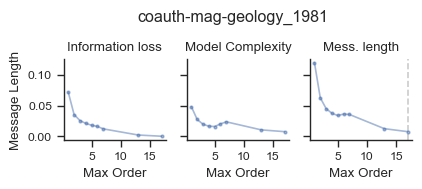

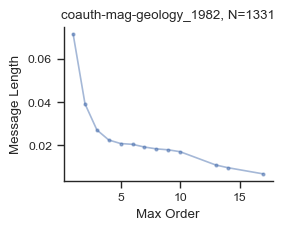

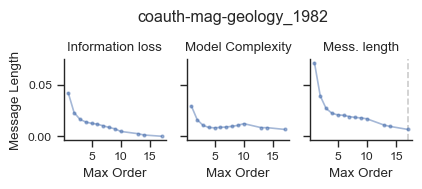

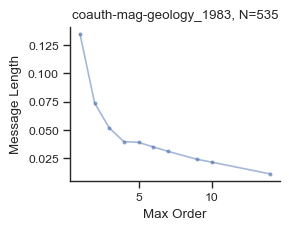

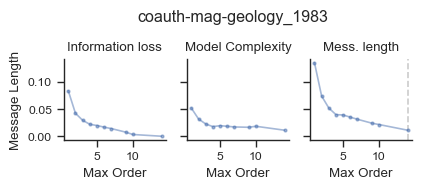

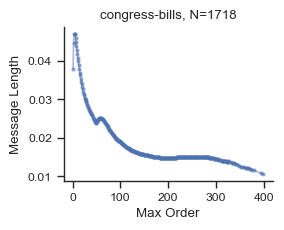

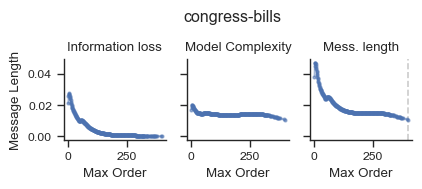

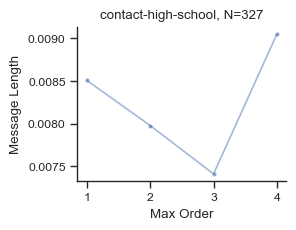

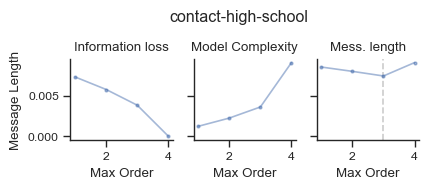

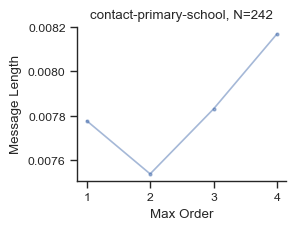

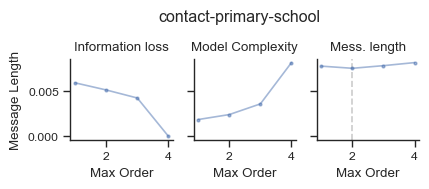

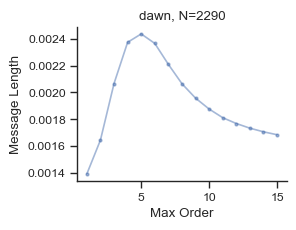

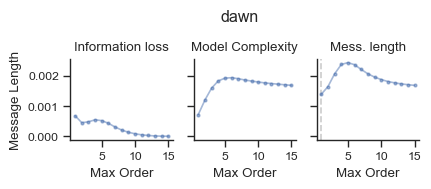

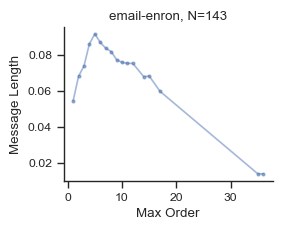

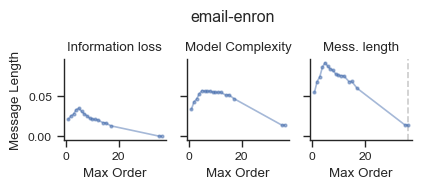

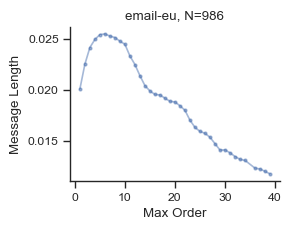

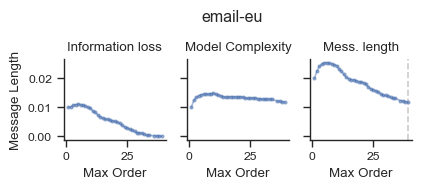

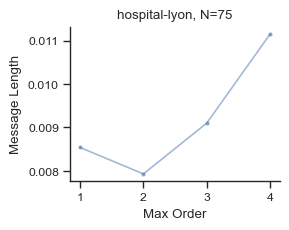

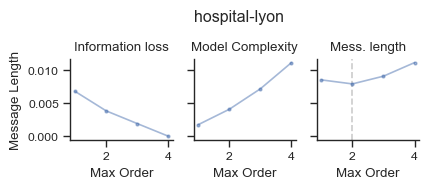

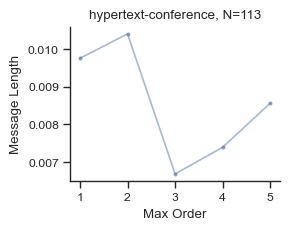

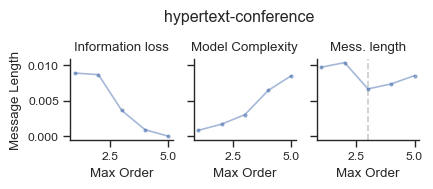

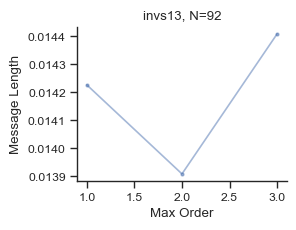

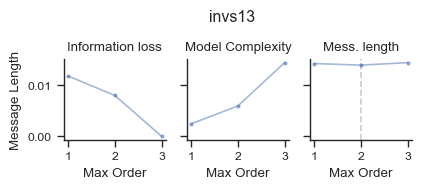

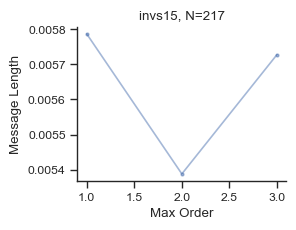

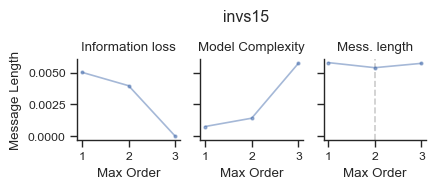

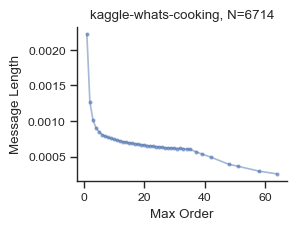

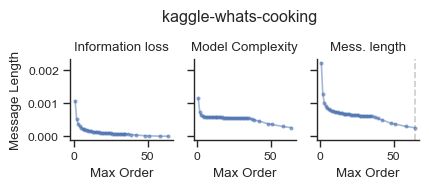

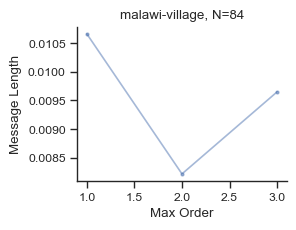

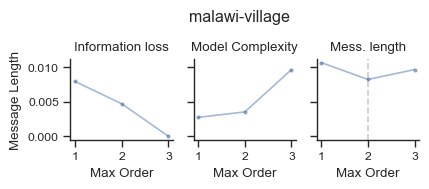

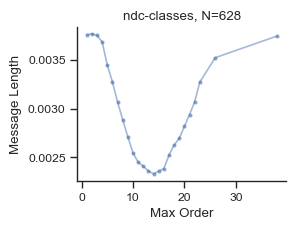

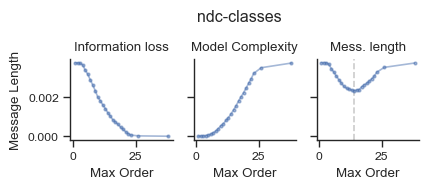

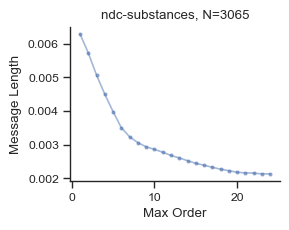

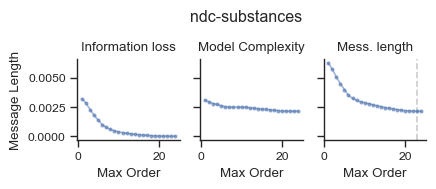

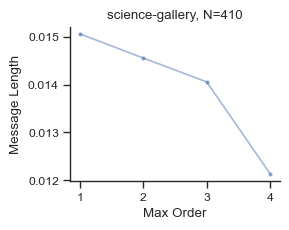

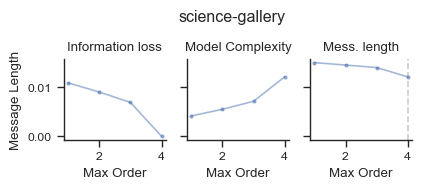

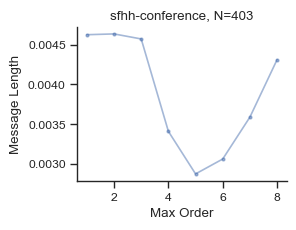

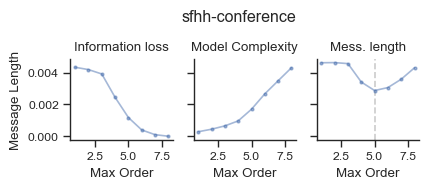

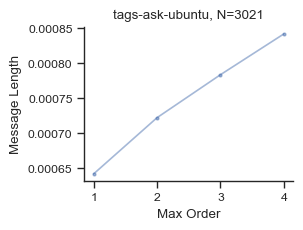

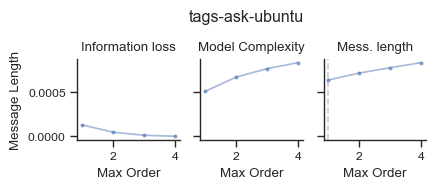

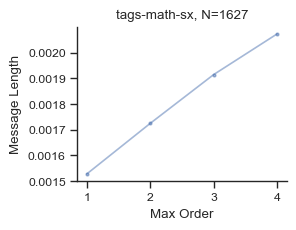

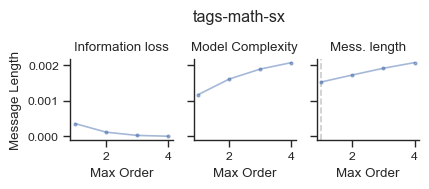

In [121]:
for name in datasets:
    
    #name = "hypertext-conference"
    data = np.load(f"{out_dir}/message_length_{name}.npz")

    message_length = data["message_length"]
    Ds_H = data["KL"]
    lZs_H = data["complexity"]
    orders = data["orders"]
    N = int(data["N"])
    
    ## first plot
    
    fig, ax = plt.subplots(1, 1, figsize=(2.7, 2))

    message_length = Ds_H + lZs_H
    ax.plot(orders, message_length, "o-", ms=2, alpha=0.5)

    ax.set_ylabel("Message Length")
    ax.set_xlabel("Max Order")
    ax.set_title("functional complex.")

    # ax.set_title(f"{name} {year}, N={N}")
    ax.set_title(f"{name}, N={N}")

    sb.despine()

    # fig_name = f"message_length_{name}_{year}_rescaled_tauc"
    fig_name = f"message_length_{name}_rescaled_tauc"

    plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
    
    ## second plot
    
    fig, axs = plt.subplots(1, 3, figsize=(4.5, 1.5), sharey=True)

    axs[0].plot(orders, Ds_H, "o-", ms=2, alpha=0.5)
    axs[0].set_title("Information loss")

    axs[1].plot(orders, lZs_H, "o-", ms=2, alpha=0.5)
    axs[1].set_title("Model Complexity")

    axs[2].plot(orders, message_length, "o-", ms=2, alpha=0.5)
    axs[2].set_title("Mess. length")


    axs[0].set_ylabel("Message Length")
    axs[0].set_xlabel("Max Order")
    axs[1].set_xlabel("Max Order")
    axs[2].set_xlabel("Max Order")

    order_argmin = np.argmin(message_length)
    order_min = orders[order_argmin]

    axs[2].axvline(order_min, ls="--", c="grey", zorder=-2, alpha=0.4)

    # ax.set_title("functional complex.")

    # ax.set_title(f"{name} {year}, N={N}")
    # fig.suptitle(f"{name}_{year}")
    fig.suptitle(f"{name}")

    sb.despine() 
    plt.subplots_adjust(top=0.65)

    # fig_name = f"message_length_{name}_{year}_rescaled_tauc_full"
    fig_name = f"message_length_{name}_rescaled_tauc_full"

    #plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
    
    plt.show()

In [164]:
n = 100

L = np.zeros((n,n))

In [165]:
entropy(L, tau=0.1)

4.60517018598809

In [166]:
np.log(n)

4.605170185988092

In [167]:
penalization(L, tau=0.1)

1.7763568394002505e-15

## fig 0

In [247]:
name = "malawi-village"

H_mlw = xgi.load_xgi_data(name)

H_mlw.cleanup(isolates=True)


In [248]:
H_mlw.edges.members()

[{26, 32, 78},
 {10, 60},
 {70, 71},
 {20, 70},
 {10, 20, 46},
 {0, 68},
 {22, 70},
 {12, 30, 37, 56},
 {27, 62},
 {17, 62},
 {17, 28},
 {0, 57},
 {52, 57},
 {46, 60},
 {48, 74},
 {5, 25},
 {25, 35},
 {8, 35},
 {35, 72},
 {1, 38, 76},
 {15, 33, 52},
 {15, 27, 52},
 {10, 46, 77},
 {46, 60, 70},
 {11, 14, 47},
 {27, 80},
 {6, 38},
 {15, 28},
 {14, 40, 43},
 {18, 23, 70},
 {23, 70},
 {9, 71},
 {46, 70, 72},
 {10, 35},
 {42, 48, 60, 80},
 {69, 72},
 {3, 69},
 {16, 29, 60},
 {50, 59},
 {16, 29},
 {63, 67},
 {16, 19},
 {23, 31},
 {16, 53},
 {35, 50},
 {0, 2},
 {31, 52},
 {25, 48},
 {63, 72},
 {3, 28},
 {14, 56},
 {27, 70},
 {25, 60, 70},
 {1, 67, 76},
 {29, 60, 63},
 {19, 31},
 {29, 58},
 {14, 67},
 {24, 63},
 {28, 35},
 {4, 34, 61},
 {28, 29},
 {46, 80},
 {0, 45},
 {29, 80},
 {46, 63, 70},
 {34, 61, 67},
 {69, 80},
 {73, 80},
 {10, 21},
 {14, 38, 75},
 {17, 24},
 {25, 43},
 {67, 76},
 {61, 70},
 {3, 73},
 {27, 33},
 {8, 68},
 {1, 76},
 {33, 57},
 {12, 30},
 {34, 67},
 {1, 58},
 {16, 52},
 {

In [249]:
xgi.max_edge_order(H_mlw)

3

In [250]:
palette = sb.cubehelix_palette(start=2.3, rot=0., dark=0.35, light=0.9, as_cmap=False, n_colors=4, reverse=False)
sb.set_palette(palette)
palette

[[0.8386983947564264, 0.9327680019013955, 0.9092552908655802],
 [0.5726826684223166, 0.7882411282035537, 0.7343622620108751],
 [0.3552744615776239, 0.6200435958444379, 0.5538645149046753],
 [0.1864737742223481, 0.42817540482404803, 0.36776204954698094]]

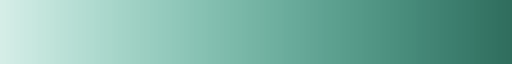

In [251]:
cmap = sb.cubehelix_palette(start=2.3, rot=0., dark=0.35, light=0.9, as_cmap=True, n_colors=3, reverse=False)
cmap

In [252]:
H_mlw.remove_nodes_from(range(60, 84))
H_mlw.cleanup(isolates=True)


In [253]:
H_mlw.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59))

In [291]:
n = 20 
H_mlw = xgi.random_hypergraph(n, ps=[5/n, 2/n**2, 4/n**3,])

In [292]:
pos = xgi.barycenter_kamada_kawai_layout(H_mlw)

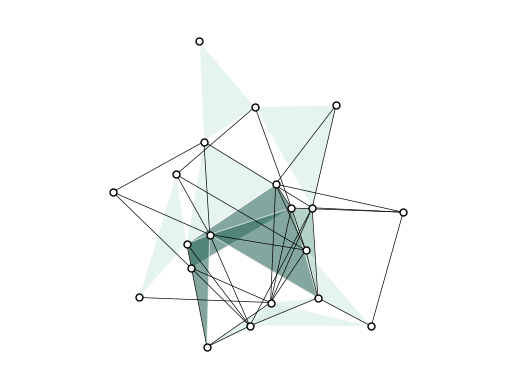

In [308]:
xgi.draw(H_mlw,pos=pos, dyad_lw=0.5, edge_fc_cmap=cmap, alpha=0.6, node_size=5)

plt.show()

In [294]:
xgi.unique_edge_sizes(H_mlw)

[2, 3, 4]

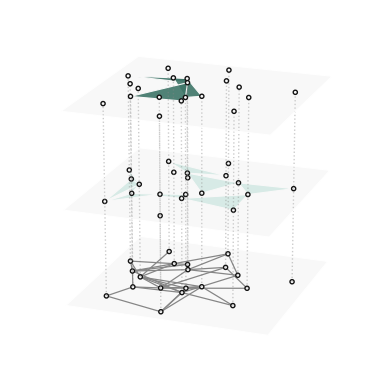

In [347]:
#fig, ax = plt.subplots(figsize=(3.5, 3.5))

xgi.draw_multilayer(
    H_mlw,
    pos=pos,
    dyad_lw=0.9,
    edge_fc_cmap=cmap,
    alpha=0.9,
    node_size=3,
    layer_color="white",
    h_angle=20,
    v_angle=20,
    sep=0.9,
)

plt.show()

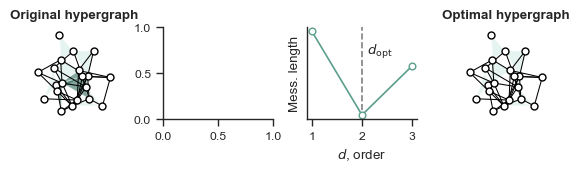

In [397]:
# Create figure and axes
fig, axes = plt.subplots(1, 4, figsize=(7, 1.2))

# First subplot (2D)
xgi.draw(H_mlw, pos=pos, dyad_lw=0.75, edge_fc_cmap=cmap, alpha=0.6, node_size=5, ax=axes[0])
axes[0].set_title("Original hypergraph", weight="bold")

# Second subplot (3D)
#axes[1].remove()  # Remove the 2D subplot
#ax_3d = fig.add_subplot(1, 3, 2, projection='3d')
#xgi.draw_multilayer(
#    H_mlw,
#    pos=pos,
#    dyad_lw=0.9,
#    edge_fc_cmap=cmap,
#    alpha=0.9,
#    node_size=3,
#    layer_color="white",
#    h_angle=20,
#    v_angle=20,
#    sep=0.9,
#    ax=ax_3d
#)

# Third subplot (2D)
y = stats[name]["message_length"]
x = stats[name]["orders"]

axes[2].plot(x, y, "o-", c=palette[2], mfc="w")
axes[2].set_xlabel("$d$, order")
axes[2].set_ylabel("Mess. length")

axes[2].set_yticks([])

axes[2].axvline(2, ls="--", c="grey", zorder=-2)
axes[2].text(2.1, 0.01, r"$d_{\rm opt}$")
#axes[2].set_title("Original hypergraph", weight="bold")

xgi.draw(H_opt,pos=pos, dyad_lw=0.75, edge_fc_cmap=cmap, alpha=0.6, node_size=5, ax=axes[3])
axes[3].set_title("Optimal hypergraph", weight="bold")


sb.despine(left=False)

plt.subplots_adjust(wspace=0.3)

#plt.tight_layout()

fig_name = f"fig_0_pipeline"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")


plt.show()

/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/drawing/draw.py:1487: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


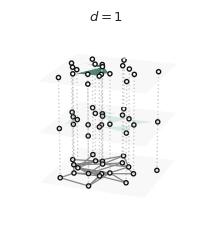

In [398]:
fig = plt.figure(figsize=(3, 2.5))
ax_3d = fig.add_subplot(1, 1, 1, projection='3d')


xgi.draw_multilayer(
    H_mlw,
    pos=pos,
    dyad_lw=0.9,
    edge_fc_cmap=cmap,
    alpha=0.9,
    node_size=3,
    layer_color="white",
    h_angle=20,
    v_angle=20,
    sep=0.9,
    ax=ax_3d
)

ax_3d.set_title("$d=1$")

fig_name = f"fig_0_multilayer"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")


plt.show()

In [360]:
edges_to_rm = H_mlw.edges.filterby("order", 3)

In [362]:
H_opt = H_mlw.copy()

In [363]:
H_opt.remove_edges_from(edges_to_rm)

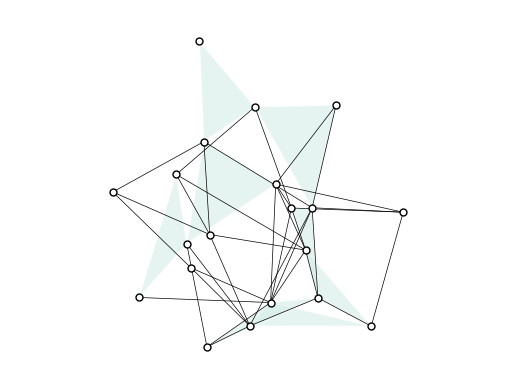

In [365]:
xgi.draw(H_opt,pos=pos, dyad_lw=0.5, edge_fc_cmap=cmap, alpha=0.6, node_size=5)

plt.show()